# Ames housing data(Advanced Regression)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
sns.set_style("dark")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
pd.set_option('display.max_columns', 100)
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape  # so there are 81 features in the data set

(1460, 81)

For simplicity,Since there are 81 columns ,so I will break it into continous and categorical features .

In [3]:

#continous columns
num_col=[col for col in df.columns if df[col].dtype!='O']
num_col=num_col[1:]
num_col


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [4]:
#categorical columns and unique elements less than 15( cardinality)
cat_col=[col for col in df.columns if df[col].dtype=='O' and df[col].nunique()<15]
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [5]:
# columns with missing value
mis_col=[col for col in df.columns if df[col].isna().any()]
mis_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
# lest see the correlation with target feature
df.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

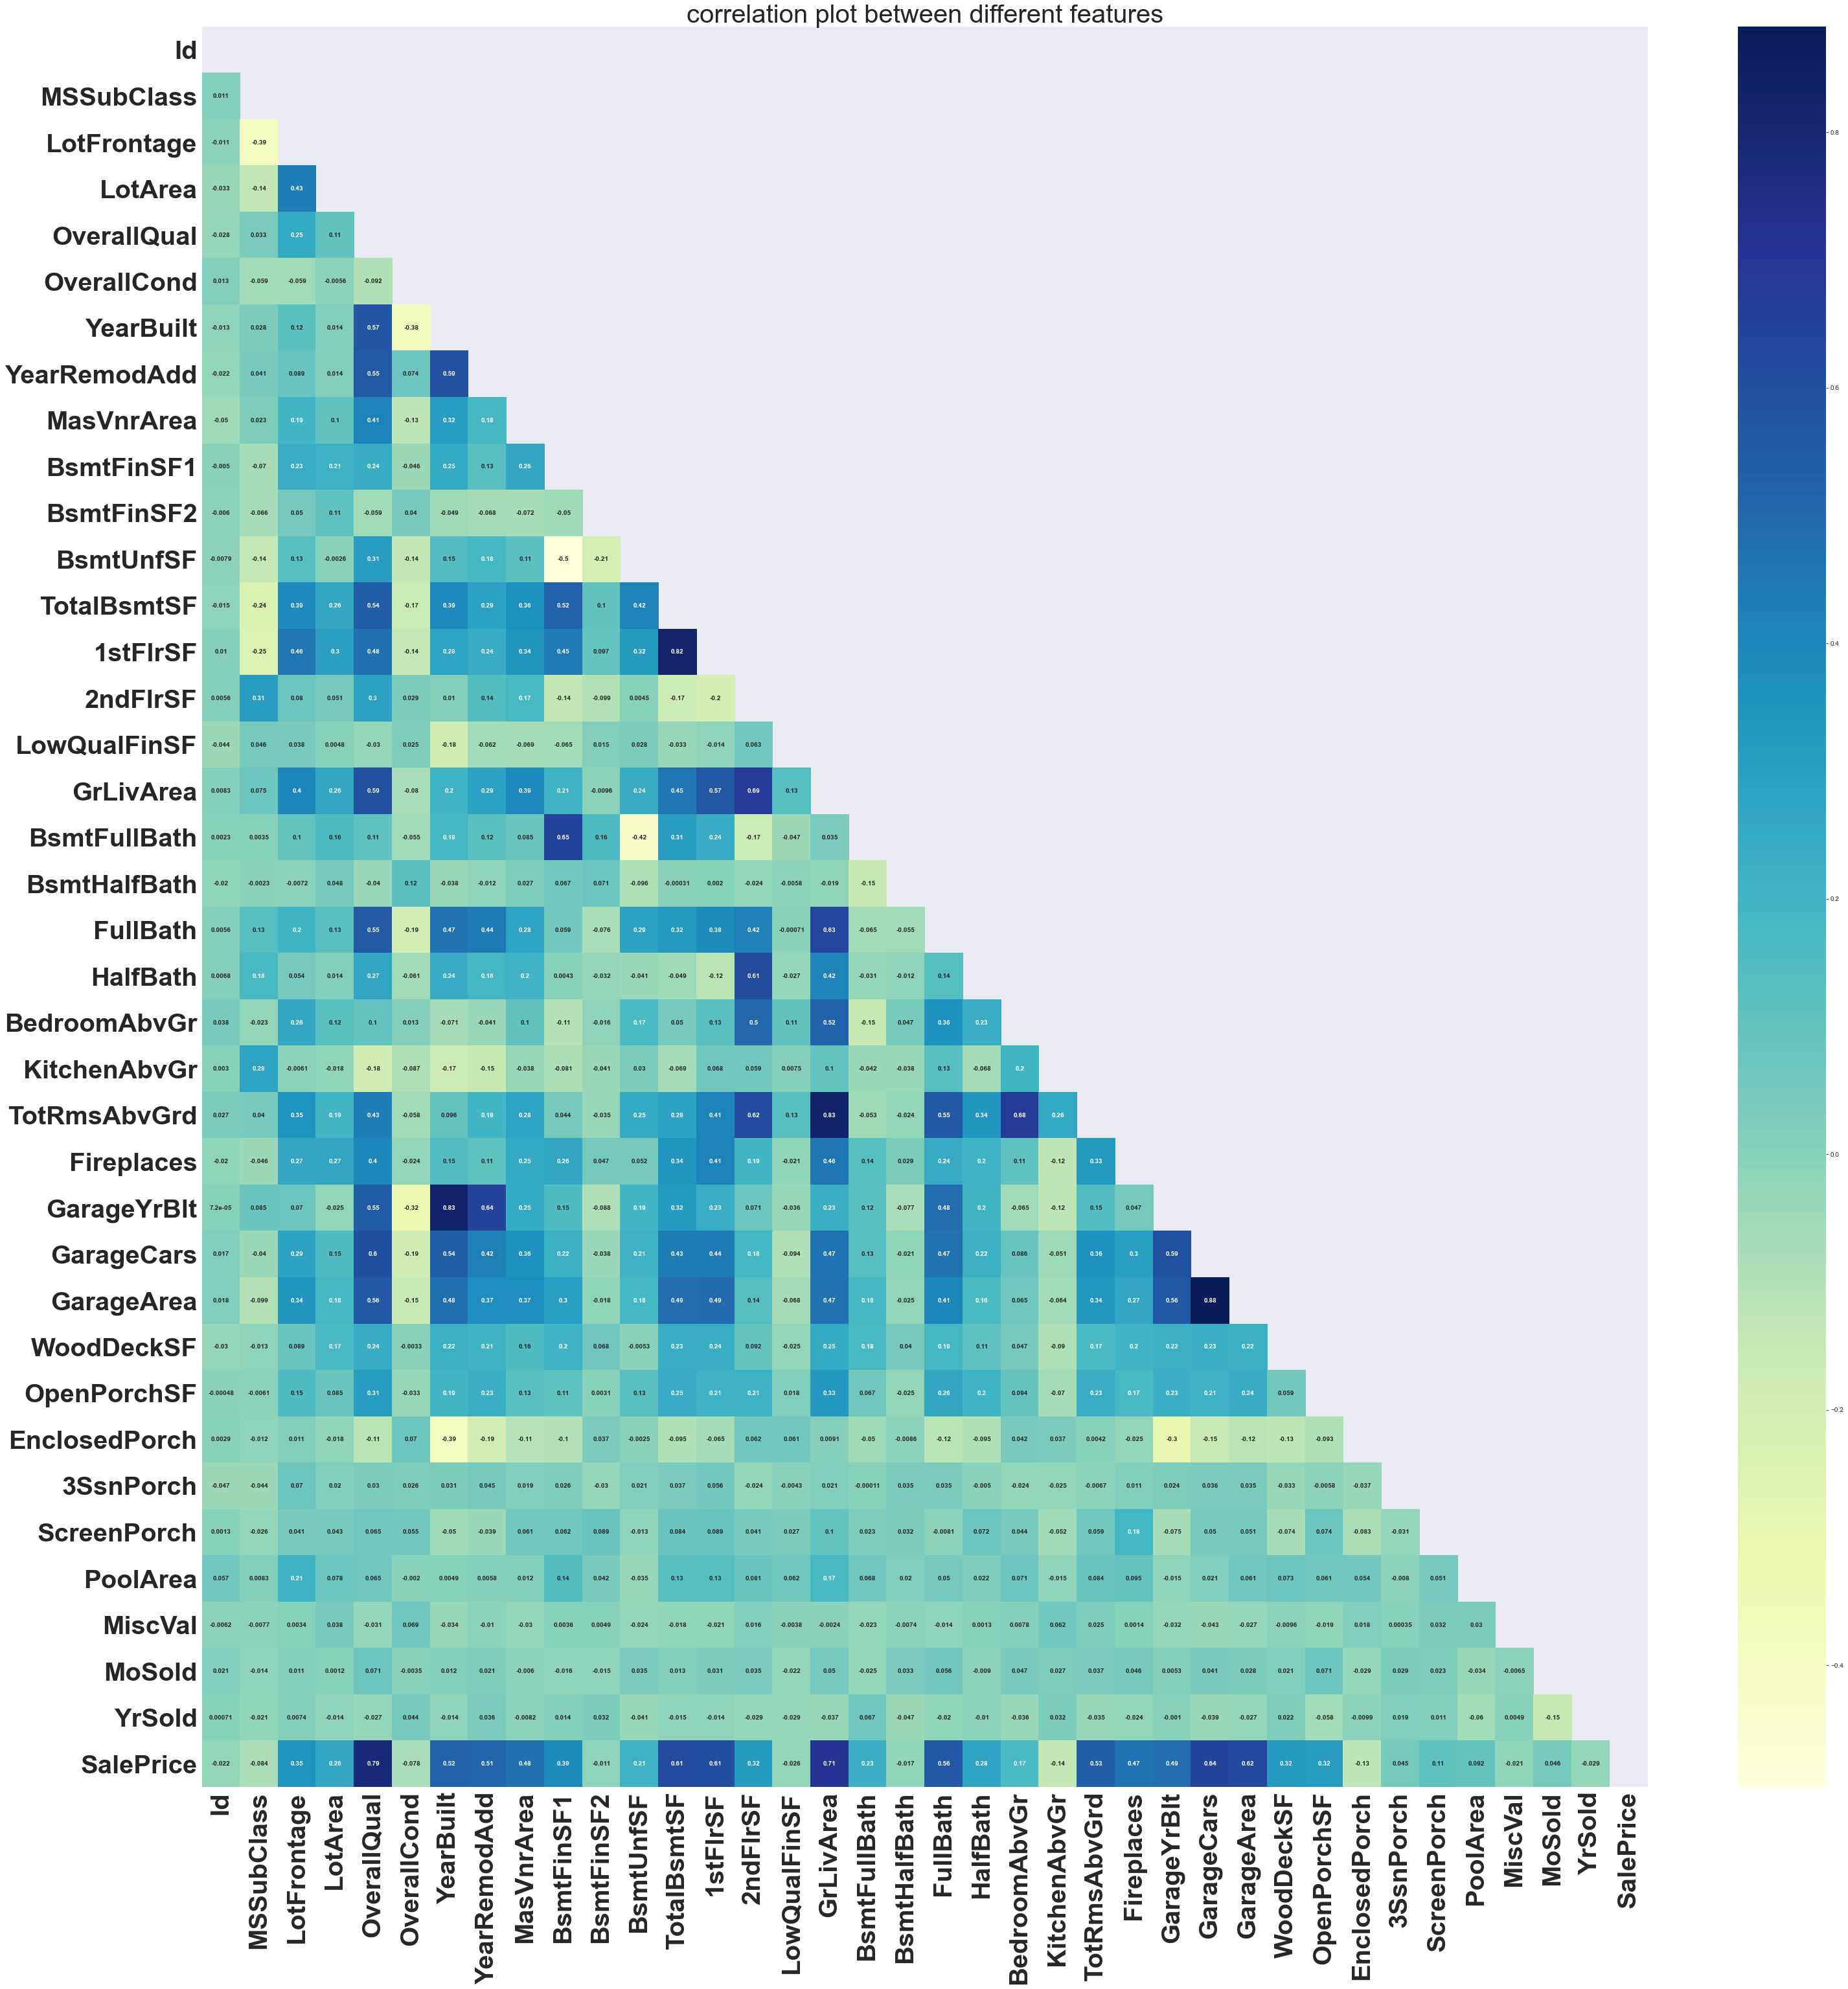

In [7]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),annot=True,mask=np.triu(np.ones_like(df.corr())),cmap="YlGnBu",annot_kws={'fontweight':'bold'})
plt.xticks(fontweight='bold',fontsize=40)
plt.yticks(fontweight='bold',fontsize=40,rotation=0)
plt.title('correlation plot between different features',fontsize=40);

So from above figure we can conclude that
- 1stFlrSF has correlation with TotalBsmtSF
- TotRmsAbvGrd has correlation with GrLivArea
- GarageArea has correlation with GarageCars
- sales price has correlation with overallqual,Totalbsmtsf,1stFlrSF,Fullbath,Fireplaces,GarageCars,Garage area
 

In [9]:
# I will make custom function to create scatter plot
def scatter_plot(df,col1,col2):
   
    plt.figure(figsize=(10,7))
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col1],df[col2])

    sns.regplot(df[col1],df[col2],color='#A035EA',ci=None,
               line_kws={'label':f'y={round(slope,6)}x + {round(intercept,2)}','color':'green'})
    plt.xlabel(col1,fontweight='bold')
    plt.ylabel(col2,fontweight='bold')
    plt.title(f' scatter plot between {col1} and {col2}',fontweight='bold')
    plt.legend()

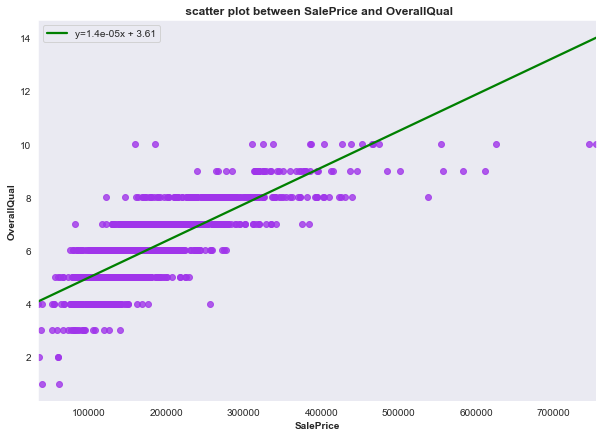

In [10]:
scatter_plot(df,'SalePrice','OverallQual')

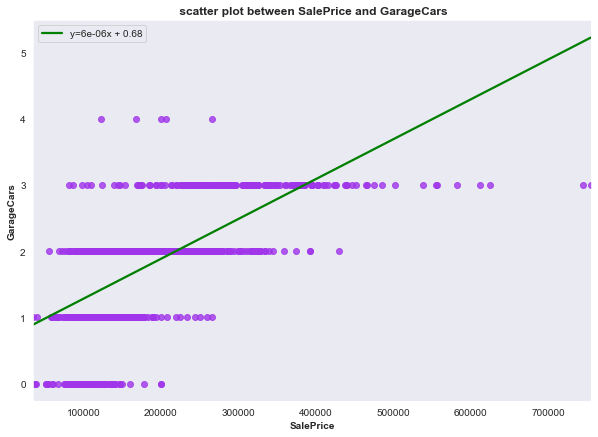

In [11]:
scatter_plot(df,'SalePrice','GarageCars')

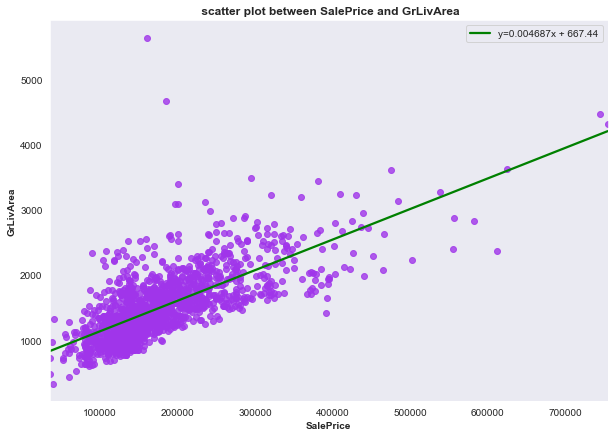

In [12]:
scatter_plot(df,'SalePrice','GrLivArea')

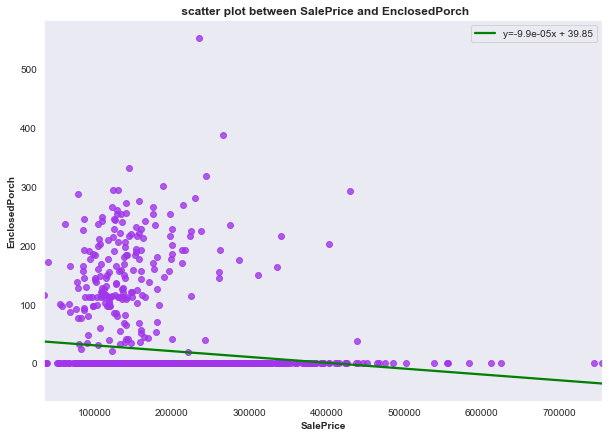

In [13]:
scatter_plot(df,'SalePrice','EnclosedPorch')

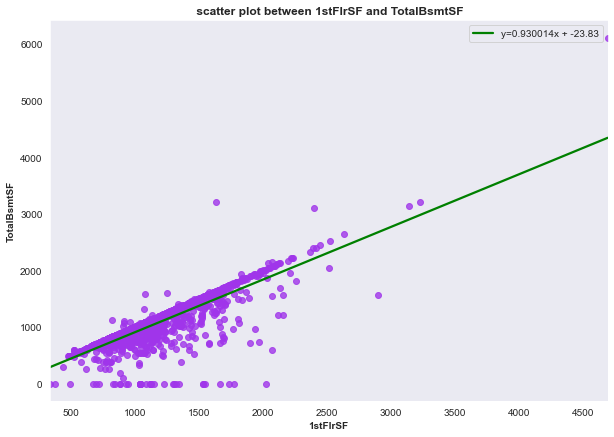

In [14]:
scatter_plot(df,'1stFlrSF','TotalBsmtSF')

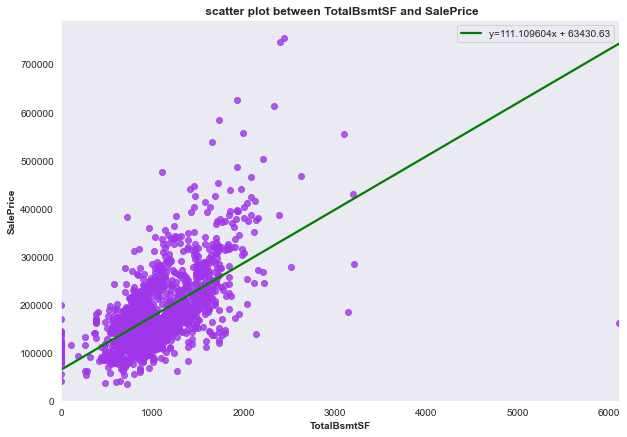

In [15]:
scatter_plot(df,'TotalBsmtSF','SalePrice')

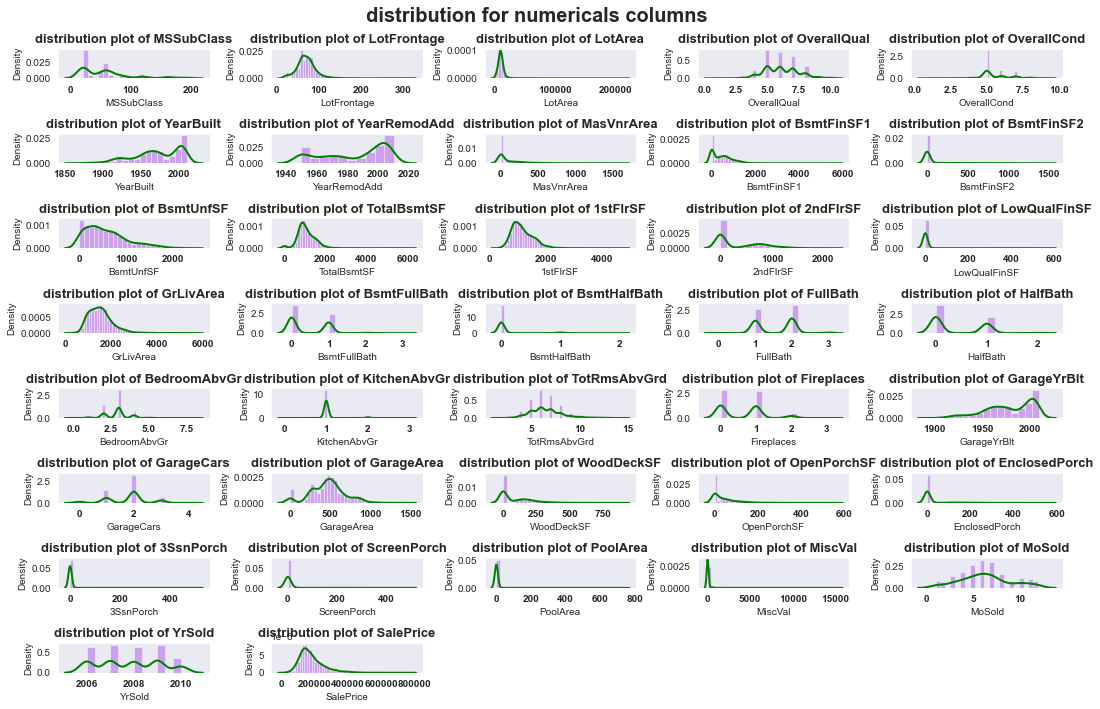

In [16]:
# lets see the distribution for continous features
plt.figure(figsize=(15,10))
for i,col in enumerate(num_col):
  plt.suptitle('distribution for numericals columns',fontweight='bold',fontsize=20)
  plt.subplot(8,5,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.distplot(df[col],color='#A035EA',kde_kws={'linewidth':2,'color':'green'})
  plt.title(f'distribution plot of {col}',fontweight='bold',fontsize=13)
  plt.tight_layout()

so, most the of the distribution is  right skwed.hence outliers exsit in right part.

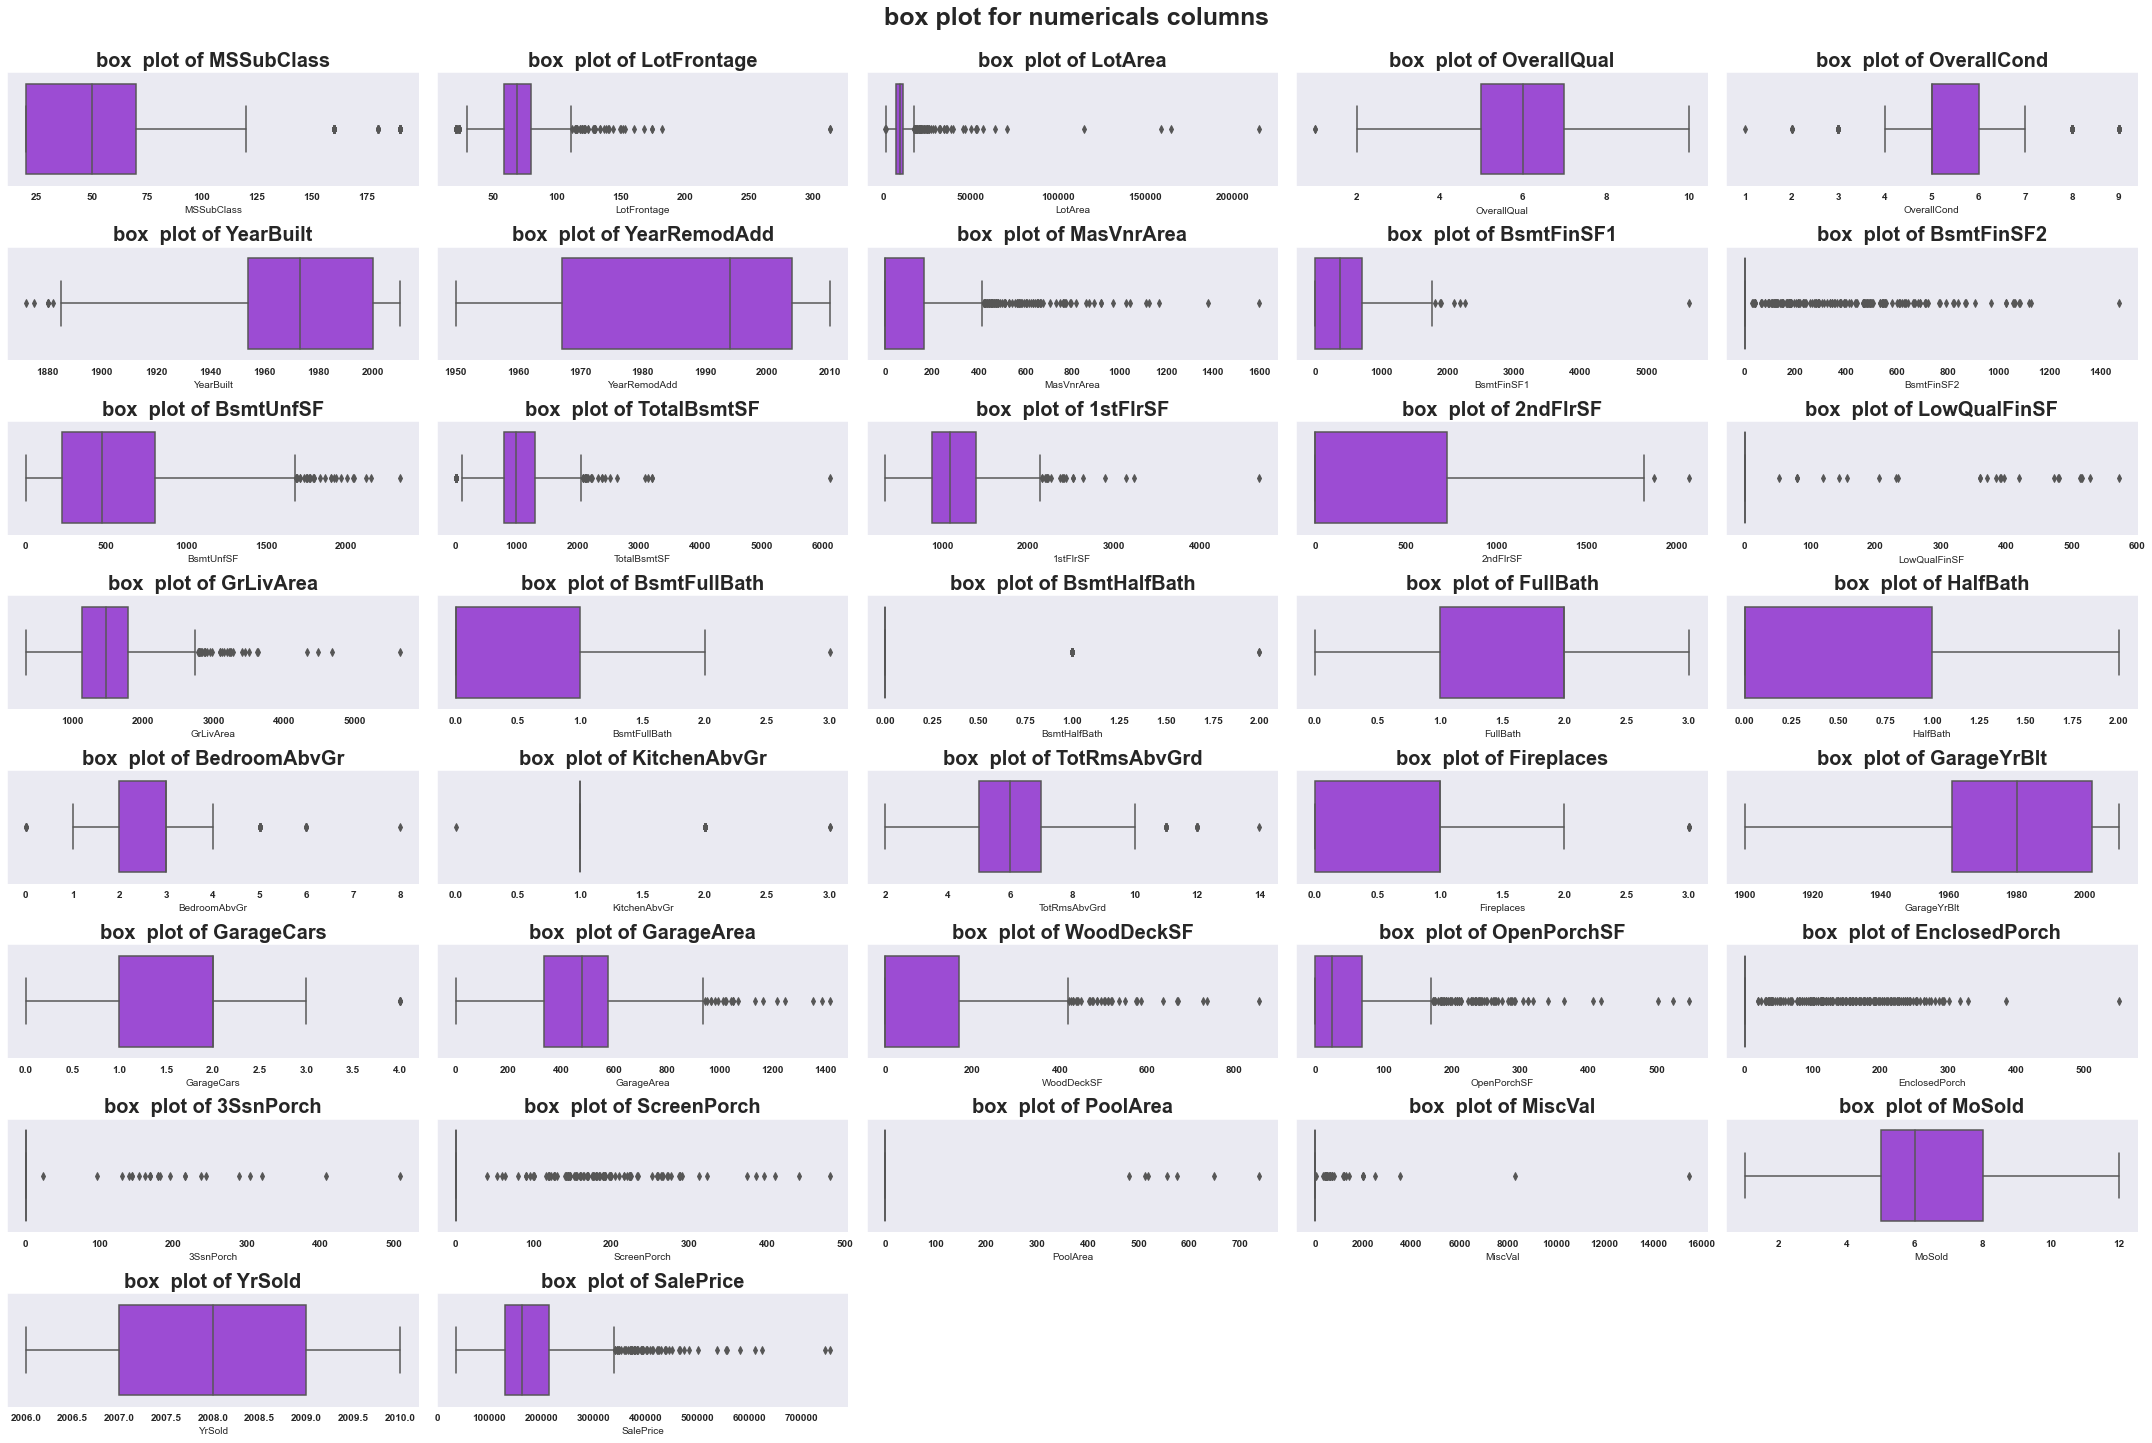

In [17]:
#lets see box plot to see  outliers
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
  plt.suptitle('box plot for numericals columns',fontweight='bold',fontsize=25,y=1)
  plt.subplot(8,5,i+1)
  plt.xticks(fontweight='bold')
  plt.xticks(fontweight='bold')
  sns.boxplot(df[col],color='#A035EA')
  plt.title(f'box  plot of {col}',fontweight='bold',fontsize=20)
  plt.tight_layout()


Since the distribution is right skwed, outliers are in right part

# Missing value

In [8]:
# i have created function that fill the nan value in equal proportion without affecting distribution
def ramdom_sample_imputation(df,col):
  random_sample=df[col].dropna().sample(df[col].isna().sum(),replace=True)
  random_sample.index=df[df[col].isnull()].index
  df.loc[df[col].isnull(),col]=random_sample

In [9]:
for i in mis_col:  # applying function
    ramdom_sample_imputation(df,i)

# Outlier

In [10]:
# here we make custom function to that any value greater than upper bound by upper bound
#similarly any value less than lower bound is replaced by lower bound
def outlier(df,col):
    #fig,(ax1,ax2)=plt.subplots(2,1)
    #sns.boxplot(df[col],ax=ax1,color='#A035EA')
    #ax1.set_title(f' {col} column before removing outliers')
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    ub=1.5*IQR+q3
    lb=q1-1.5*IQR
    df[col]=np.where(df[col]>ub,ub,np.where(df[col]<lb,lb,df[col]))
    #sns.boxplot(df[col],ax=ax2)
    #ax2.set_title(f'{col} column after removing outliers')
    #plt.tight_layout()

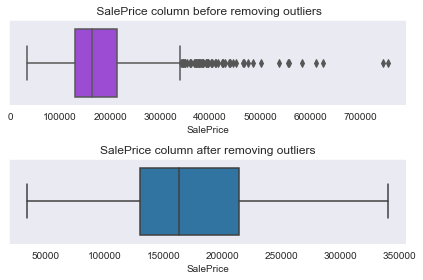

In [21]:
outlier(df,'SalePrice')

In [11]:
# applying function to remove the outliers
for i in num_col:
    outlier(df,i)

# feature extraction

In [29]:
X = df.drop('SalePrice',axis=1)
y = df.SalePrice

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [13]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

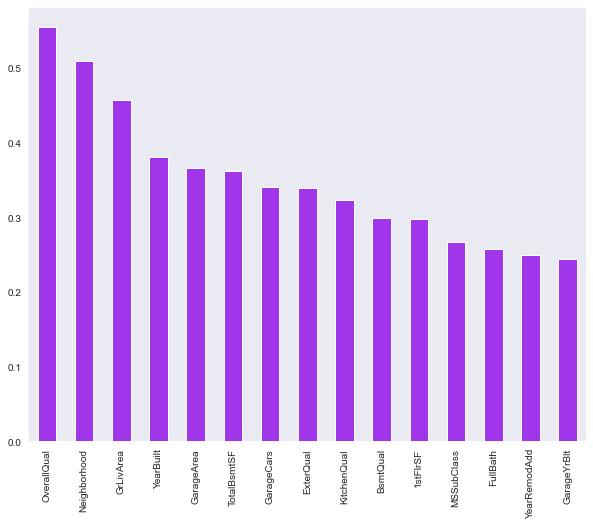

In [14]:
mi_scores.nlargest(15).plot(kind='bar',color='#A035EA',figsize=(10,8));

In [15]:
my_list=list(mi_scores.nlargest(15).index)
my_list

['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'YearBuilt',
 'GarageArea',
 'TotalBsmtSF',
 'GarageCars',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 '1stFlrSF',
 'MSSubClass',
 'FullBath',
 'YearRemodAdd',
 'GarageYrBlt']

In [16]:
X=df[my_list]
y=df.SalePrice

In [17]:
# categorical columns(final after feature selection)
cat_col=[col for col in X.columns if X[col].dtype=='O']  
cat_col

['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual']

In [18]:
# continous columns(final after feature selection)
num_col=[col for col in X.columns if X[col].dtype in ['int64','float64']]
num_col

['OverallQual',
 'GrLivArea',
 'YearBuilt',
 'GarageArea',
 'TotalBsmtSF',
 'GarageCars',
 '1stFlrSF',
 'MSSubClass',
 'FullBath',
 'YearRemodAdd',
 'GarageYrBlt']

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

# Preprocessing for numerical data
numerical_transformer = Pipeline([
    ('imputer',IterativeImputer()),
    ('scalar',StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

In [20]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ])

In [21]:
from sklearn.model_selection import KFold


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
#now i am using stratified cross validation
kfold=KFold(n_splits=5,shuffle=True,random_state=0)

In [22]:
model = RandomForestRegressor(random_state=0) # this is my model with all default parameter
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # ceating my pipeline  and passing  two steps
                                  ('model', model)
                                 ])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,shuffle=True,
                                                                random_state=0)
my_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'YearBuilt', 'GarageArea',
                                                   'TotalBsmtSF', 'GarageCars',
                                                   '1stFlrSF', 'MSSubClass',
                                                   'FullBath', 'YearRemodAdd',
                                                   'GarageYrBlt']),
                                                 ('cat',
                                                  Pipeline(st

In [23]:
from sklearn import set_config
set_config(display='diagram')


In [24]:
def predict(model):
    
    #pipeline
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # ceating my pipeline  and passing  two steps
                                  ('model', model)
                                 ])
    my_pipeline.fit(X_train,y_train)
    # model score
    print(f' train score:- {my_pipeline.score(X_train,y_train)}')
    print(f'test score:-{my_pipeline.score(X_test,y_test)}')
    
    
    #residual plot
    plt.figure(figsize=(10,7))
    plt.scatter(my_pipeline.predict(X_train),my_pipeline.predict(X_train) - y_train, c = "blue",
                marker = "s", label = "Training data")
    plt.scatter(my_pipeline.predict(X_test), my_pipeline.predict(X_test) - y_test, c = "lightgreen", 
                marker = "s", label = "Validation data")
    plt.title("residual plot")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y = 0 , xmin=0,xmax=400000,color = "red")
    plt.show()


    
    
    # prediction plot
    plt.figure(figsize=(10,7))
    plt.scatter(my_pipeline.predict(X_train), y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(my_pipeline.predict(X_test), y_test, c = "lightgreen", marker = "s", label = "Validation data")
   
    plt.title(f'  plot for validation vrs training ',fontweight='bold')
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.grid()

 train score:- 0.8929344932658023
test score:-0.8371202637943911


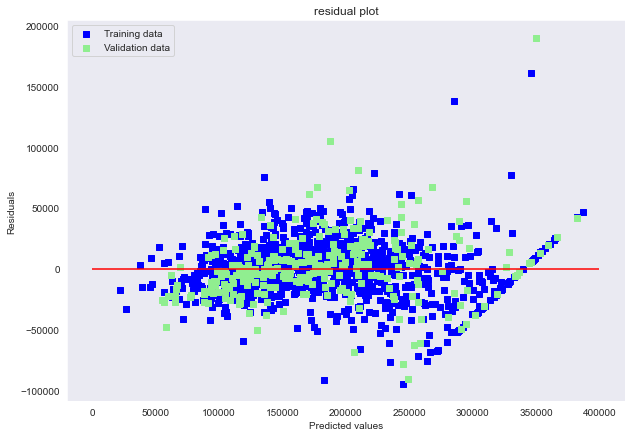

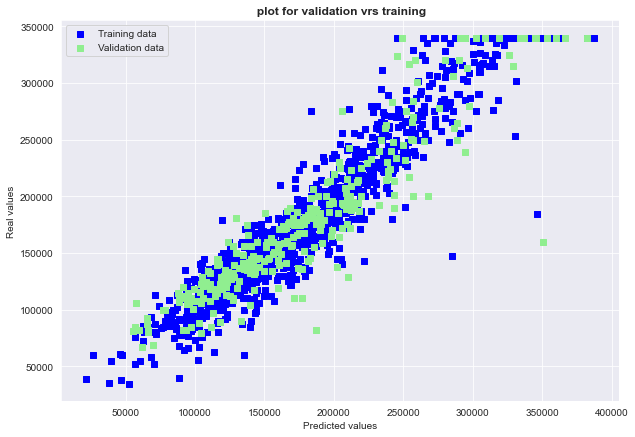

In [40]:
from sklearn.linear_model import Ridge
predict(Ridge())

 train score:- 0.9823340935691051
test score:-0.8715633760341548


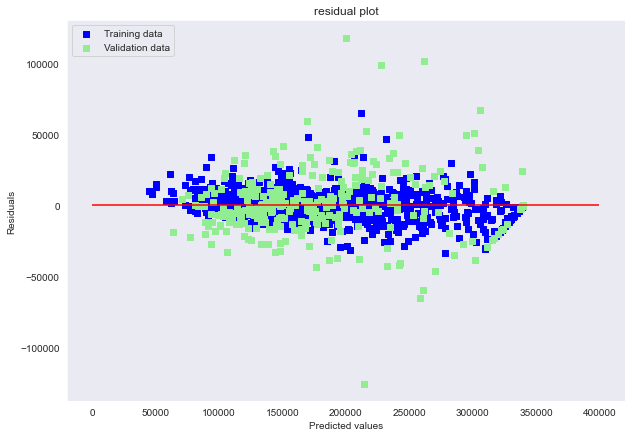

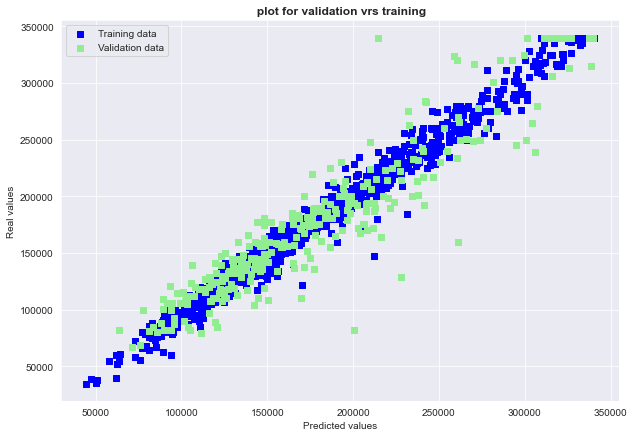

In [41]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())

 train score:- 0.909392313169014
test score:-0.8335117662777417


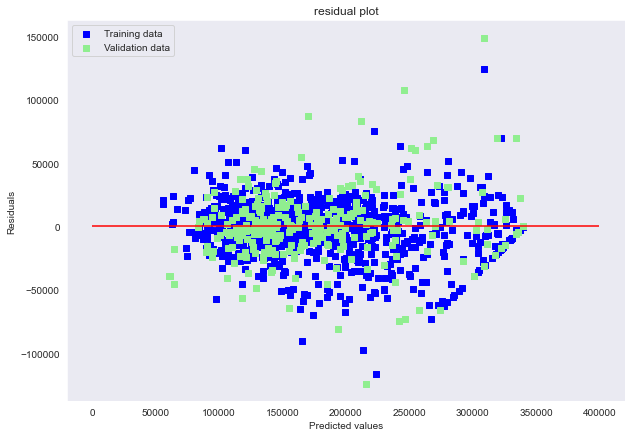

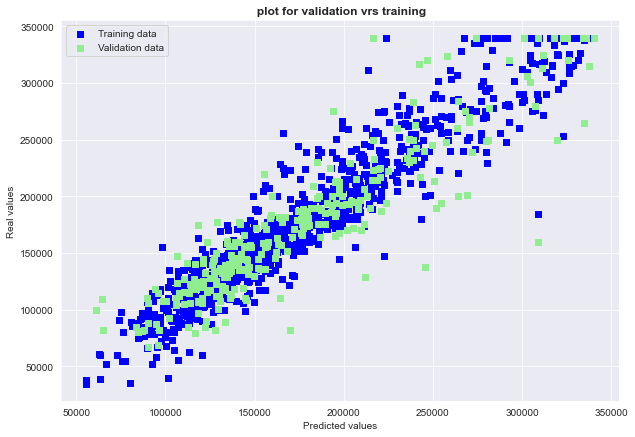

In [42]:
from sklearn.neighbors import KNeighborsRegressor
predict(KNeighborsRegressor())

 train score:- 0.9982752922055176
test score:-0.8479565920886883


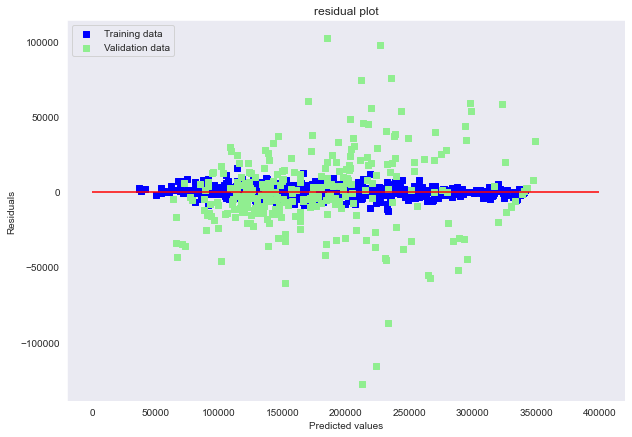

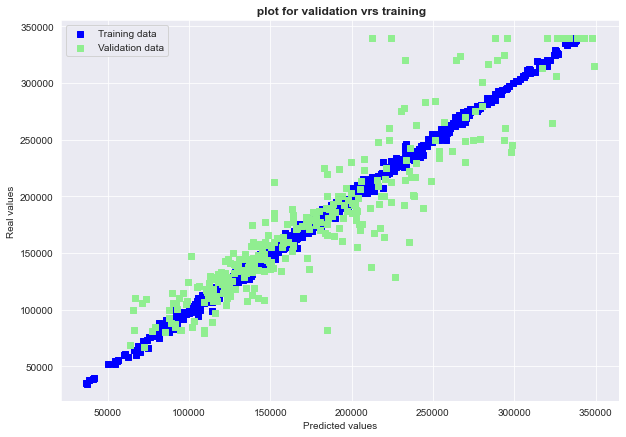

In [43]:
from xgboost import XGBRegressor
predict(XGBRegressor())

# Hypertunning

# Ridge

In [44]:
param={
    'model__alpha':np.logspace(-10, 1, 400)
}

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
model=Ridge()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=param,n_iter=5,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [46]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scalar',
                                                                                                StandardScaler())]),
                                                                               ['OverallQual',
                                                                                'GrLivArea',
                                                                                'GarageCars',
                                                                                'GarageArea',
                                                                                'TotalBsmtSF',
                                                                                'YearBuilt',
                                                                                '1stFlrSF',
                                                                                'MSSubClass',
                                                                                'YearRemodAdd',
                                                                                'FullB...
       2.32228110e+00, 2.47447864e+00, 2.63665090e+00, 2.80945159e+00,
       2.99357729e+00, 3.18977022e+00, 3.39882122e+00, 3.62157300e+00,
       3.85892347e+00, 4.11182940e+00, 4.38131027e+00, 4.66845237e+00,
       4.97441317e+00, 5.30042602e+00, 5.64780507e+00, 6.01795064e+00,
       6.41235480e+00, 6.83260739e+00, 7.28040247e+00, 7.75754513e+00,
       8.26595874e+00, 8.80769273e+00, 9.38493086e+00, 1.00000000e+01])},
                   scoring='r2', verbose=1)

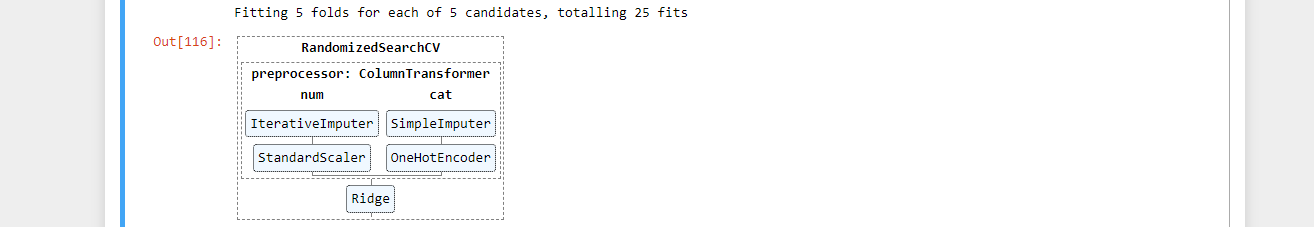

In [47]:
random_search.best_score_

0.8802506233700832

In [48]:
param=random_search.best_params_
param

{'model__alpha': 0.2362836026355175}

 train score:- 0.8930238414773799
test score:-0.8370110031929192


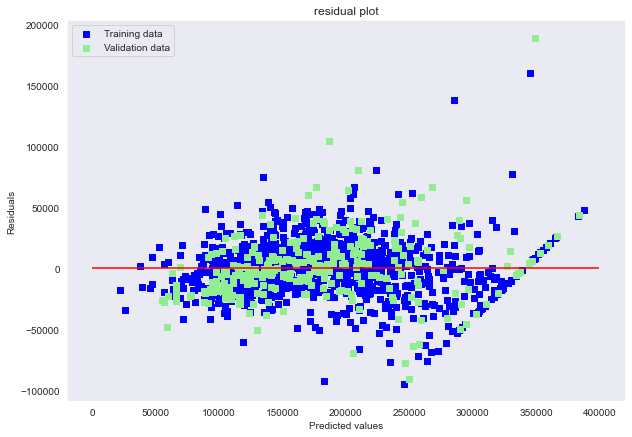

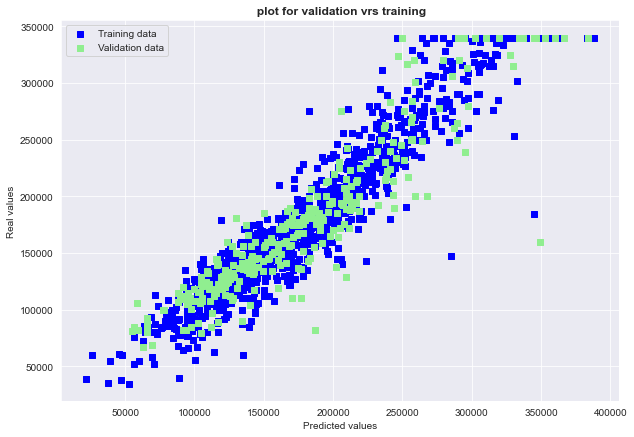

In [49]:
model=Ridge(alpha=0.2362836026355175)
predict(model)

# KNeighborsRegressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor
param={
'model__n_neighbors':[int(x) for x in np.linspace(1,50,50)]
    
}
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
model=KNeighborsRegressor()
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=param,n_iter=5,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [48]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scalar',
                                                                                                StandardScaler())]),
                                                                               ['OverallQual',
                                                                                'GrLivArea',
                                                                                'GarageArea',
                                                                                'YearBuilt',
                                                                                'GarageCars',
                                                                                'TotalBsmtSF',
                                                                                '1stFlrSF',
                                                                                'MSSubClass',
                                                                                'FullBath',
                                                                                'YearRemod...
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['Neighborhood',
                                                                                'ExterQual',
                                                                                'KitchenQual',
                                                                                'BsmtQual'])])),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'model__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10, 11,
                                                               12, 13, 14, 15,
                                                               16, 17, 18, 19,
                                                               20, 21, 22, 23,
                                                               24, 25, 26, 27,
                                                               28, 29, 30, ...]},
                   scoring='r2', verbose=1)

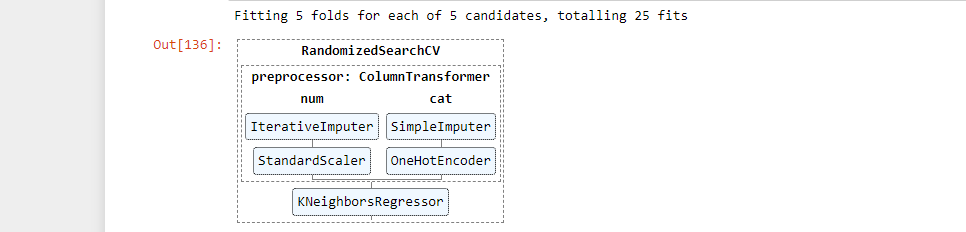

In [49]:
random_search.best_score_

0.8535840584907278

In [50]:
random_search.best_params_

{'model__n_neighbors': 9}

 train score:- 0.9087037896299466
test score:-0.8341990172843385


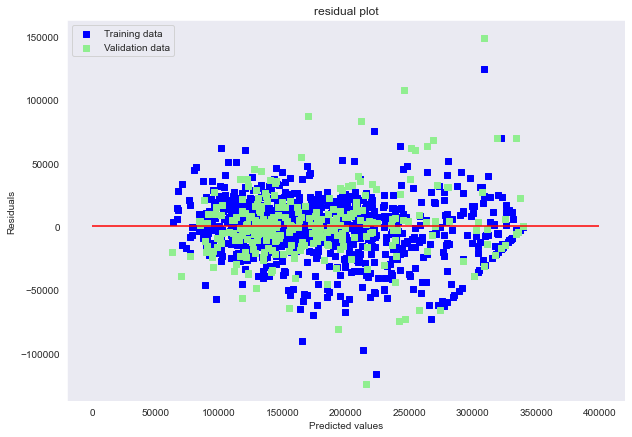

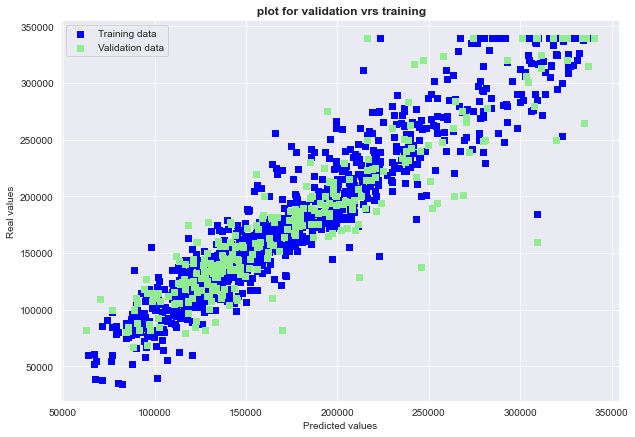

In [51]:
predict(KNeighborsRegressor(n_neighbors=5))

# RandomForestRegressor

In [52]:
params={
    'model__n_estimators':[int(x) for x in np.linspace(100,2500,20)],
    'model__max_depth':range(1,30),
    'model__min_samples_split':[2,4,8,16,32,64,128]
    
}
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
model=RandomForestRegressor(random_state=0)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=10,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [53]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scalar',
                                                                                                StandardScaler())]),
                                                                               ['OverallQual',
                                                                                'GrLivArea',
                                                                                'GarageArea',
                                                                                'YearBuilt',
                                                                                'GarageCars',
                                                                                'TotalBsmtSF',
                                                                                '1stFlrSF',
                                                                                'MSSubClass',
                                                                                'FullBath',
                                                                                'YearRemod...
                                                                               ['Neighborhood',
                                                                                'ExterQual',
                                                                                'KitchenQual',
                                                                                'BsmtQual'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=0))]),
                   n_jobs=-1,
                   param_distributions={'model__max_depth': range(1, 30),
                                        'model__min_samples_split': [2, 4, 8,
                                                                     16, 32, 64,
                                                                     128],
                                        'model__n_estimators': [100, 226, 352,
                                                                478, 605, 731,
                                                                857, 984, 1110,
                                                                1236, 1363,
                                                                1489, 1615,
                                                                1742, 1868,
                                                                1994, 2121,
                                                                2247, 2373,
                                                                2500]},
                   scoring='r2', verbose=1)

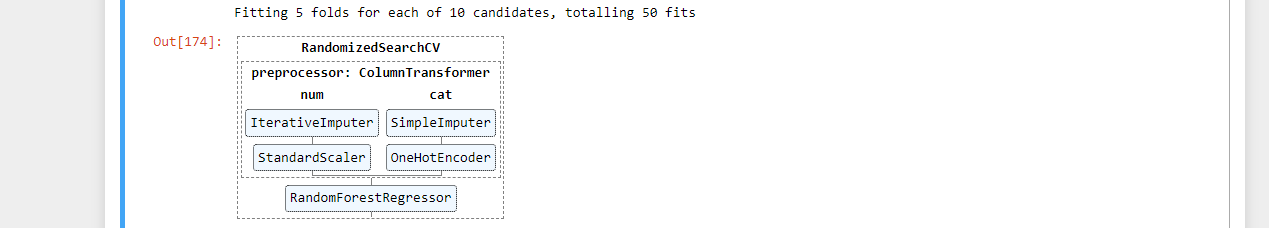

In [54]:
random_search.best_score_

0.8618669794598984

In [55]:
random_search.best_params_

{'model__n_estimators': 984,
 'model__min_samples_split': 2,
 'model__max_depth': 28}

In [58]:
param={'n_estimators': 984,
 'min_samples_split': 2,
 'max_depth': 28}

 train score:- 0.9823514424790387
test score:-0.8745377474302367


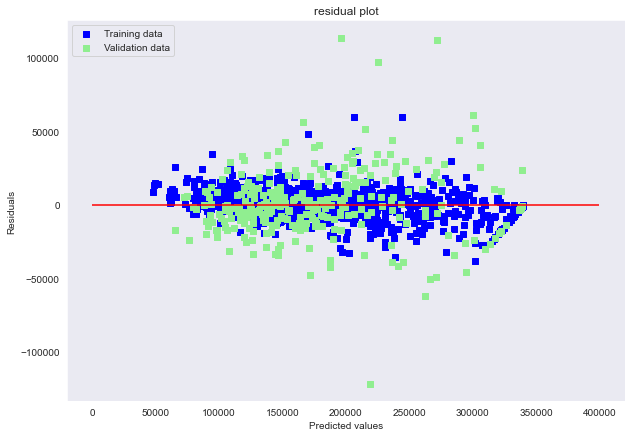

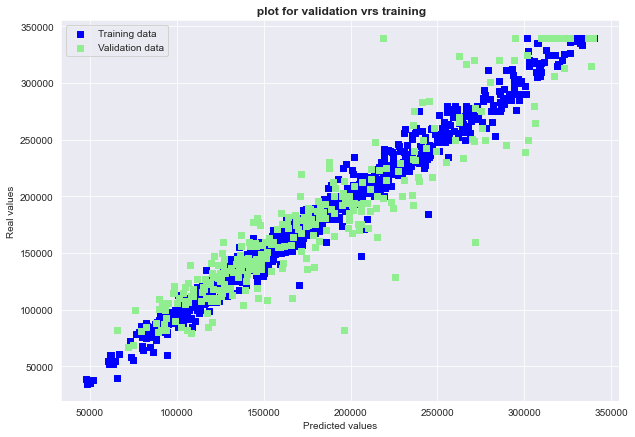

In [59]:
predict(RandomForestRegressor(**param))

# XGBRegressor

In [50]:
from xgboost import XGBRegressor
params={
    'model__n_estimators':[int(x) for x in np.linspace(100,2000,20)],
    'model__max_depth':range(1,30),
     'model__gamma':np.linspace(0,2000,50),
    'model__learning_rate':np.linspace(0.01,0.1,10),
    'model__subsample':np.linspace(0.01,0.15,10)
    
    
}
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
model=XGBRegressor(random_state=0)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)
                                 ])

#scores = cross_val_score(my_pipeline, X, y,cv=kfold,scoring='r2')
random_search=RandomizedSearchCV(my_pipeline,param_distributions=params,n_iter=10,scoring='r2',
                                 n_jobs=-1, cv=kfold,verbose=1)

In [51]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scalar',
                                                                                                StandardScaler())]),
                                                                               ['OverallQual',
                                                                                'GrLivArea',
                                                                                'GarageCars',
                                                                                'GarageArea',
                                                                                'TotalBsmtSF',
                                                                                'YearBuilt',
                                                                                '1stFlrSF',
                                                                                'MSSubClass',
                                                                                'YearRemodAdd',
                                                                                'FullB...
                                        'model__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                                        'model__max_depth': range(1, 30),
                                        'model__n_estimators': [100, 200, 300,
                                                                400, 500, 600,
                                                                700, 800, 900,
                                                                1000, 1100,
                                                                1200, 1300,
                                                                1400, 1500,
                                                                1600, 1700,
                                                                1800, 1900,
                                                                2000],
                                        'model__subsample': array([0.01      , 0.02555556, 0.04111111, 0.05666667, 0.07222222,
       0.08777778, 0.10333333, 0.11888889, 0.13444444, 0.15      ])},
                   scoring='r2', verbose=1)

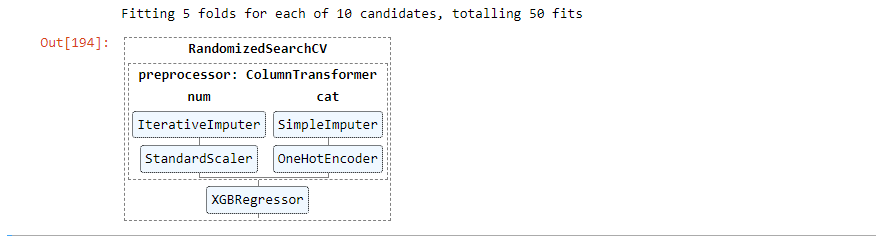

In [52]:
random_search.best_score_

0.887148556214062

In [53]:
random_search.best_params_

{'model__subsample': 0.13444444444444442,
 'model__n_estimators': 1000,
 'model__max_depth': 17,
 'model__learning_rate': 0.01,
 'model__gamma': 530.6122448979592}

In [54]:
param={'subsample': 0.13444444444444442,
 'n_estimators': 1000,
 'max_depth': 17,
 'learning_rate': 0.01,
 'gamma': 530.6122448979592}

 train score:- 0.9672152824289345
test score:-0.8780063813883667


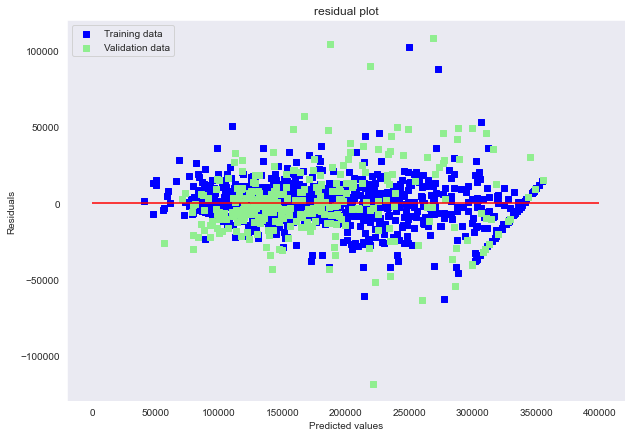

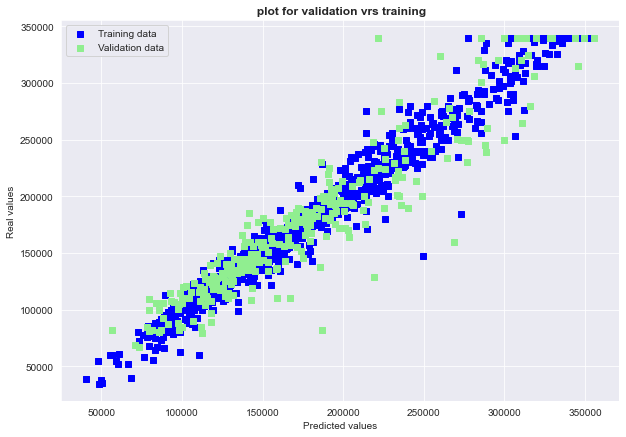

In [55]:
predict(XGBRegressor(**param))

# Learning Curve

Learning curves helps us to  identify whether the collected data is sufficient for ML building or not.


# Learning curve for XGBRegressor

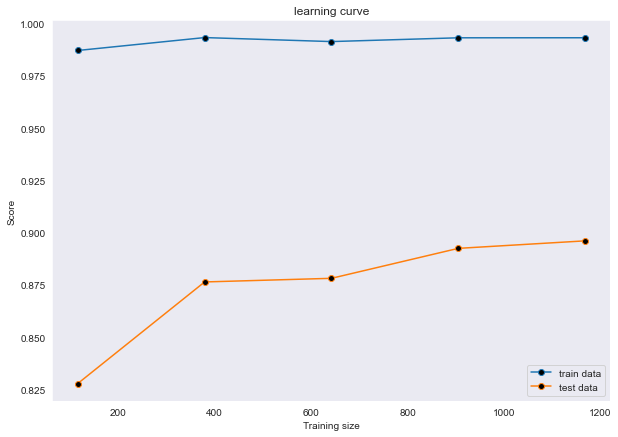

In [108]:
from sklearn.model_selection import learning_curve


estimator=XGBRegressor(subsample=0.13444444444444442,n_estimators=400,max_depth=24,learning_rate=0.06000000000000001,gamma=448.9795918367347)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y,cv=kfold,return_times=True)
plt.figure(figsize=(10,7))
plt.plot(train_sizes,np.mean(train_scores,axis=1),label='train data',marker='o',mfc='black')
plt.plot(train_sizes,np.mean(test_scores,axis=1),label='test data',marker='o',mfc='black')
plt.title('learning curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend();

We can see large gap between training and testing  curve which clearly indicate that we need more data for this model.For good model gap between two curves should decrease as we goes on increasing training data size



# Learning curve for KNeighboursRegressor

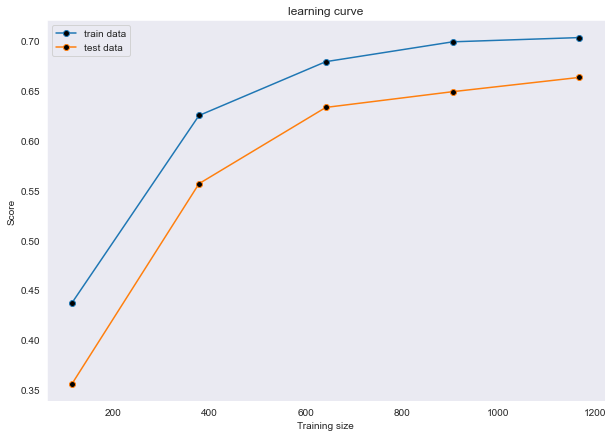

In [96]:
from sklearn.model_selection import learning_curve

estimator=KNeighborsRegressor(n_neighbors=21)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y,cv=kfold,return_times=True)
plt.figure(figsize=(10,7))
plt.plot(train_sizes,np.mean(train_scores,axis=1),label='train data',marker='o',mfc='black')
plt.plot(train_sizes,np.mean(test_scores,axis=1),label='test data',marker='o',mfc='black')
plt.title('learning curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend();

for this model we  see gap between two curves are less compared to  XGBRegressor.But still we need little more data for 
accurate prediction

# Learning curve for Ridge

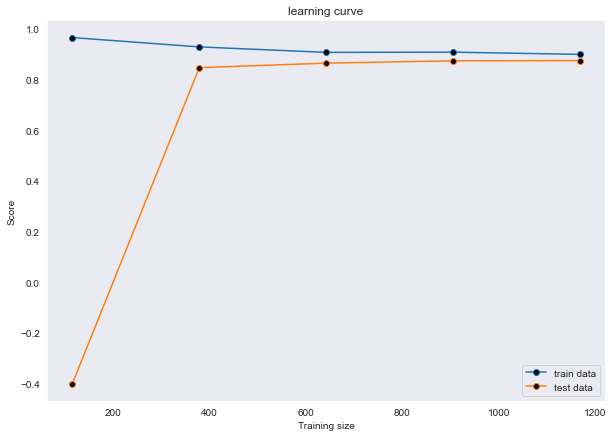

In [106]:
from sklearn.model_selection import learning_curve

estimator=Ridge(alpha=0.15151342924760514)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y,cv=kfold,return_times=True)
plt.figure(figsize=(10,7))
plt.plot(train_sizes,np.mean(train_scores,axis=1),label='train data',marker='o',mfc='black')
plt.plot(train_sizes,np.mean(test_scores,axis=1),label='test data',marker='o',mfc='black')
plt.title('learning curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend();

For Ridge model training data size is sufficient as we can see less gap between two curves

# Learning curve for Random forest Regressor

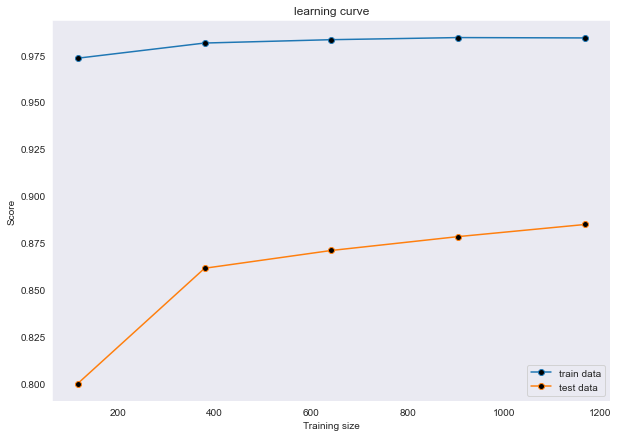

In [107]:

estimator=RandomForestRegressor(random_state=0,n_estimators=1994,min_impurity_split=4,max_depth=14)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y,cv=kfold,return_times=True)
plt.figure(figsize=(10,7))
plt.plot(train_sizes,np.mean(train_scores,axis=1),label='train data',marker='o',mfc='black')
plt.plot(train_sizes,np.mean(test_scores,axis=1),label='test data',marker='o',mfc='black')
plt.title('learning curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend();

for this model also we need more data set as gap between two curve is large